<a href="https://colab.research.google.com/github/KerollinDiniz/Estat-stica-com-Python/blob/main/Kerollin_Desafio_Estat%C3%ADstica_Frequ%C3%AAncias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Impotar bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
# Importar bibliotecas para estatística
import scipy.stats as stat
from scipy.stats import zscore


In [4]:
# Carregar arquivo Json
enem2023_data = pd.read_json('enem_2023.json')

Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios). Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem doanoanteriorparaalinhar melhor as estratégias do cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.



In [ ]:
# Imprimir primeiros 10 dados da tabela
enem2023_data.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


In [ ]:
enem2023_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
enem2023_data.shape

(1000, 6)

In [ ]:
enem2023_data.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
disciplinas_enem = enem2023_data.columns.difference(['sexo'])

maior_amplitude_nota = 0
disciplina_maior_amplitude = ''

for disciplina in disciplinas_enem:
  enem2023_data.loc[:, disciplina] = pd.to_numeric(enem2023_data.loc[:, disciplina], errors='coerce')
  amplitude = enem2023_data.loc[:, disciplina].max() - enem2023_data.loc[:, disciplina].min()
  if amplitude > maior_amplitude_nota:
        maior_amplitude_nota = amplitude
        disciplina_maior_amplitude = disciplina


# Exibir o resultado
print(f"Disciplina com maior amplitude é {disciplina_maior_amplitude}, o valor da amplitude é {maior_amplitude_nota:.2f}.")

Disciplina com maior amplitude é Redação, o valor da amplitude é 729.16.


2. Qual é a média e a mediana para cadaumadasdisciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
disciplinas_enem = enem2023_data.columns.difference(['sexo'])


for disciplina in disciplinas_enem:
    enem2023_data[disciplina] = pd.to_numeric(enem2023_data[disciplina], errors='coerce')
    media = enem2023_data[disciplina].mean()
    mediana = enem2023_data[disciplina].median(skipna=True)

    print(f"{disciplina}, Média: {media:.2f}, Mediana: {mediana:.2f}")

Ciências da natureza, Média: 499.32, Mediana: 500.48
Ciências humanas, Média: 527.04, Mediana: 524.52
Linguagens, Média: 514.52, Mediana: 515.05
Matemática, Média: 535.97, Mediana: 533.25
Redação, Média: 637.78, Mediana: 635.27
Sexo, Média: nan, Mediana: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada umadasdisciplinas ponderado: a. Redação- 2 b. Matemática e suas Tecnologias- 4 c. Linguagens, Códigos e suas Tecnologias- 2 d. Ciências Humanas e suas Tecnologias- 1 e. Ciências da Natureza e suas Tecnologias- 1 Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
for coluna in enem2023_data.columns.difference(['sexo']):
  enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

#enem2023_data = enem2023_data.dropna(subset=['Redação', 'Matemática', 'Linguagens', 'Ciências humanas', 'Ciências da natureza'])


pesos = {'Redação': 2, 'Matemática':4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

enem2023_data['nota'] = (
    enem2023_data['Redação'] * pesos['Redação'] +
    enem2023_data['Matemática'] * pesos['Matemática'] +
    enem2023_data['Linguagens'] * pesos['Linguagens'] +
    enem2023_data['Ciências humanas'] * pesos['Ciências humanas'] +
    enem2023_data['Ciências da natureza'] * pesos['Ciências da natureza']
)

melhores500_alunos = enem2023_data.nlargest(500, 'nota')
media = melhores500_alunos['nota'].mean()
desvio_padrao = melhores500_alunos['nota'].std()

print(f"Média: {media:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")

Média: 5572.90
Desvio Padrão: 404.36


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
for coluna in enem2023_data.columns.difference(['sexo']):
  enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

#enem2023_data = enem2023_data.dropna(subset=['Redação', 'Matemática', 'Linguagens', 'Ciências humanas', 'Ciências da natureza'])

pesos = {'Redação': 2, 'Matemática':4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

enem2023_data['nota'] = (
    enem2023_data['Redação'] * pesos['Redação'] +
    enem2023_data['Matemática'] * pesos['Matemática'] +
    enem2023_data['Linguagens'] * pesos['Linguagens'] +
    enem2023_data['Ciências humanas'] * pesos['Ciências humanas'] +
    enem2023_data['Ciências da natureza'] * pesos['Ciências da natureza']
)

melhores40_alunos = enem2023_data.nlargest(40, 'nota')
media = melhores40_alunos['nota'].mean()
variancia = melhores40_alunos['nota'].var()

print(f"Média: {media:.2f}")
print(f"Variancia: {variancia:.2f}")

Média: 6366.83
Variancia: 29576.75


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
for coluna in ['Matemática', 'Linguagens']:enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

percentil_matematica = enem2023_data['Matemática'].quantile(0.75, interpolation='higher')
percentil_linguagens = enem2023_data['Linguagens'].quantile(0.75, interpolation='higher')

print(f"Valor teto do terceiro quartil Matemática: {percentil_matematica:.2f}")
print(f"Valor teto do terceiro quartil Linguagens: {percentil_linguagens:.2f}")

Valor teto do terceiro quartil Matemática: 593.50
Valor teto do terceiro quartil Linguagens: 571.64


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

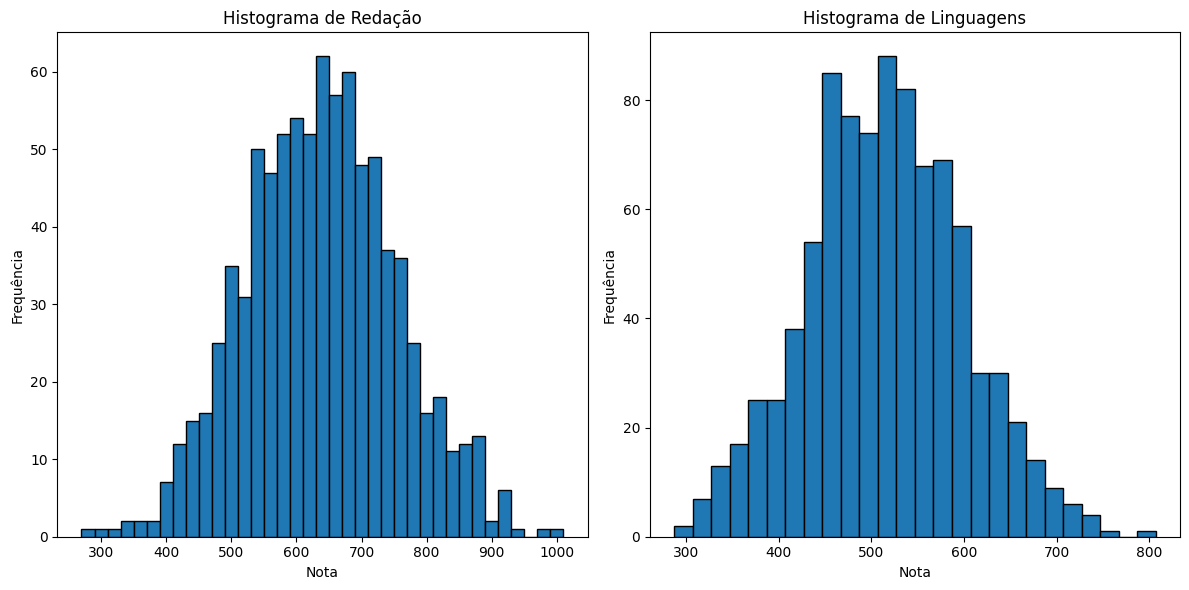

In [ ]:
for coluna in ['Redação', 'Linguagens']:
    enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

plt.figure(figsize=(12, 6))

# Histograma para Redação
plt.subplot(1, 2, 1)
plt.hist(enem2023_data['Redação'].dropna(), bins=range(int(enem2023_data['Redação'].min()), int(enem2023_data['Redação'].max()) + 20, 20), edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Histograma Linguagens
plt.subplot(1, 2, 2)
plt.hist(enem2023_data['Linguagens'].dropna(), bins=range(int(enem2023_data['Linguagens'].min()), int(enem2023_data['Linguagens'].max()) + 20, 20), edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Exibir os histogramas
plt.tight_layout()
plt.show()

São simétricos, pois os valoresdos lados são próximos ou iguais.

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

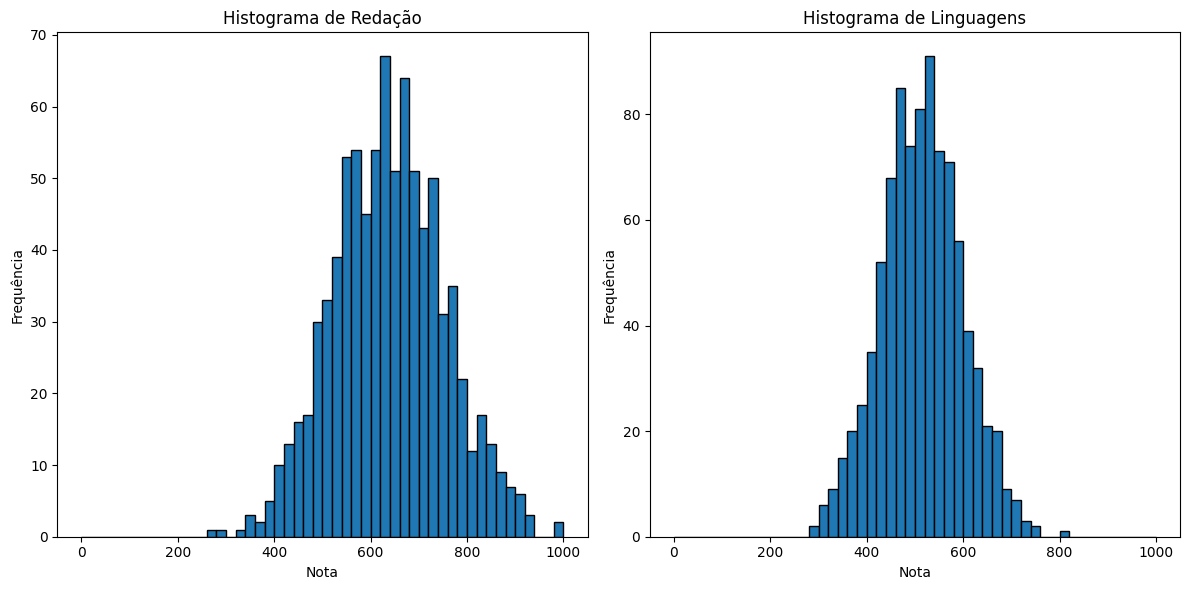

In [ ]:
for coluna in ['Redação', 'Linguagens']:
    enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

plt.figure(figsize=(12, 6))

# Histograma para Redação
plt.subplot(1, 2, 1)
plt.hist(enem2023_data['Redação'].dropna(), bins=range(0, 1001, 20), edgecolor='black', range=[0, 1000])
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Histograma para Linguagens
plt.subplot(1, 2, 2)
plt.hist(enem2023_data['Linguagens'].dropna(), bins=range(0, 1001, 20), edgecolor='black', range=[0, 1000])
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Permanece simétrico.

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

Outliers Ciências da natureza: 824
Outliers Redação: 860


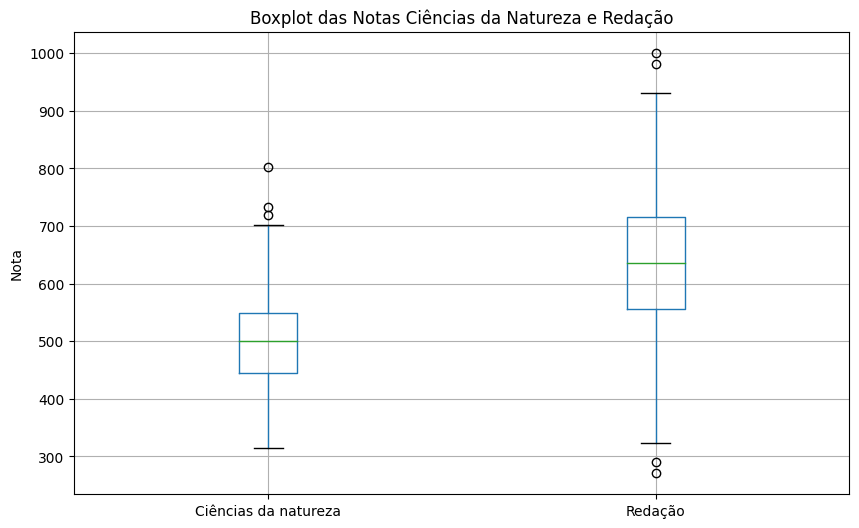

In [10]:
#for coluna in ['Ciências da natureza', 'Redação']:enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

#enem2023_data['zscore_ciencia'] = zscore(enem2023_data['Ciências da natureza'].dropna())
#enem2023_data['zscore_redacao'] = zscore(enem2023_data['Redação'].dropna())

for coluna in enem2023_data.columns.difference(['sexo']):enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')
disciplinas_natureza_redacao = enem2023_data[['Ciências da natureza', 'Redação']]

# Os quartis dividem esse conjunto em quatro (daí vem o nome quartis), cada um contendo 25% (um quarto) dos dados
# Já o primeiro quartil (Q1) será a base da caixa e o terceiro quartil (Q3) o topo
# A altura da caixa corresponde à diferença entre o terceiro e o primeiro quartil (Q1 - Q3).

def calcular_limites_iqr(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q1 - Q3 # Essa diferença recebe o nome de amplitude interquartil,
                  #abreviada como IQR (que vem do termo em inglês, interquartile range)
# Calcular os limites superior e inferior teóricos.
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Um boxplot é composto pelos limites superior e inferior.
# Esses limites correspondem, respectivamente, ao maior e menor valor do conjunto de dados que não sejam outliers.

limite_inf_cn, limite_sup_cn = calcular_limites_iqr(disciplinas_natureza_redacao['Ciências da natureza'])
limite_inf_red, limite_sup_red = calcular_limites_iqr(disciplinas_natureza_redacao['Redação'])

# Um outlier é um valor que destoa do conjunto de dados
outliers_cn = disciplinas_natureza_redacao[(disciplinas_natureza_redacao['Ciências da natureza'] < limite_inf_cn) | (disciplinas_natureza_redacao['Ciências da natureza'] > limite_sup_cn)]
outliers_red = disciplinas_natureza_redacao[(disciplinas_natureza_redacao['Redação'] < limite_inf_red) | (disciplinas_natureza_redacao['Redação'] > limite_sup_red)]

print(f"Outliers Ciências da natureza: {len(outliers_cn)}")
print(f"Outliers Redação: {len(outliers_red)}")

# Gerar boxplot
plt.figure(figsize=(10, 6))
disciplinas_natureza_redacao.boxplot()
plt.title('Boxplot das Notas Ciências da Natureza e Redação')
plt.ylabel('Nota')
plt.show()



9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
for coluna in ['Ciências da natureza', 'Redação']:
    enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

selecionadas = enem2023_data[['Ciências da natureza', 'Redação']]

# Método IQR
def calcular_limites(dados):
    Q1 = dados.quantile(0.25)
    Q3 = dados.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

limite_inferior_cn, limite_superior_cn = calcular_limites(selecionadas['Ciências da natureza'].dropna())
limite_inferior_red, limite_superior_red = calcular_limites(selecionadas['Redação'].dropna())

# Remover os outliers
sem_outliers = selecionadas[
    (selecionadas['Ciências da natureza'] >= limite_inferior_cn) & (selecionadas['Ciências da natureza'] <= limite_superior_cn) &
    (selecionadas['Redação'] >= limite_inferior_red) & (selecionadas['Redação'] <= limite_superior_red)
]

# Calcular as médias sem outliers
media_cn_sem_outliers = sem_outliers['Ciências da natureza'].mean()
media_red_sem_outliers = sem_outliers['Redação'].mean()

# Calcular as médias com outliers
media_cn_com_outliers = selecionadas['Ciências da natureza'].mean()
media_red_com_outliers = selecionadas['Redação'].mean()

def verificar_alteracao_significativa(media_sem_outliers, media_com_outliers):
    diferenca = abs(media_sem_outliers - media_com_outliers) / media_com_outliers
    return diferenca > 0.05

alteracao_significativa_cn = verificar_alteracao_significativa(media_cn_sem_outliers, media_cn_com_outliers)
alteracao_significativa_red = verificar_alteracao_significativa(media_red_sem_outliers, media_red_com_outliers)

if alteracao_significativa_cn or alteracao_significativa_red:
    print('A média foi alterada significativamente.')
else:
    print('A média não foi alterada significativamente.')

print(f"Média Ciências da natureza com outliers: {media_cn_com_outliers:.2f}")
print(f"Média Ciências da natureza sem outliers: {media_cn_sem_outliers:.2f}")
print(f"Média Redação com outliers: {media_red_com_outliers:.2f}")
print(f"Média Redação sem outliers: {media_red_sem_outliers:.2f}")


A média não foi alterada significativamente.
Média Ciências da natureza com outliers: 499.32
Média Ciências da natureza sem outliers: 500.81
Média Redação com outliers: 637.78
Média Redação sem outliers: 637.72


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
for coluna in enem2023_data.columns.difference(['sexo']):enem2023_data[coluna] = pd.to_numeric(enem2023_data[coluna], errors='coerce')

# Calcular média e desvio padrão
def calcular_media_desvio(df, coluna):
    media_geral = df[coluna].mean()
    desvio_padrao_geral = df[coluna].std()
    return media_geral, desvio_padrao_geral

# Substituir valores nulos por média, moda e mediana
media_valores = enem2023_data.fillna(enem2023_data.mean(numeric_only=True))

moda_valores = enem2023_data.fillna(enem2023_data.mode().iloc[0])

mediana_valores = enem2023_data.fillna(enem2023_data.median(numeric_only=True))

media_media, desvio_media = calcular_media_desvio(media_valores, 'nota')
media_moda, desvio_moda = calcular_media_desvio(moda_valores, 'nota')
media_mediana, desvio_mediana = calcular_media_desvio(mediana_valores, 'nota')

print(f"Substituindo por Média: Média = {media_media:.2f}, Desvio Padrão = {desvio_media:.2f}")
print(f"Substituindo por Moda: Média = {media_moda:.2f}, Desvio Padrão = {desvio_moda:.2f}")
print(f"Substituindo por Mediana: Média = {media_mediana:.2f}, Desvio Padrão = {desvio_mediana:.2f}")


Substituindo por Média: Média = 5496.50, Desvio Padrão = 461.50
Substituindo por Moda: Média = 5496.50, Desvio Padrão = 461.50
Substituindo por Mediana: Média = 5496.50, Desvio Padrão = 461.50
